In [2]:
#importacion de librerias

import os
import pandas as pd
from matplotlib import pyplot as plt #Linia extra para poder realizar la grafica
import numpy as np #Linea extra 

In [3]:
# Establecer directorio de trabajo y cargar datos

#os.chdir ('C: \\ Users \\ rohan \\ Documents \\ Analytics \\ Data')
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

In [4]:
# Crear clases numéricas para especies (0,1,2) 

iris.loc[iris['species']=='virginica','species']=0
iris.loc[iris['species']=='versicolor','species']=1
iris.loc[iris['species']=='setosa','species'] = 2
iris = iris[iris['species']!=2]

In [5]:
# Crear entrada y salida columnas

X = iris[['petal_length', 'petal_width']].values.T
Y = iris[['species']].values.T
Y = Y.astype('uint8')

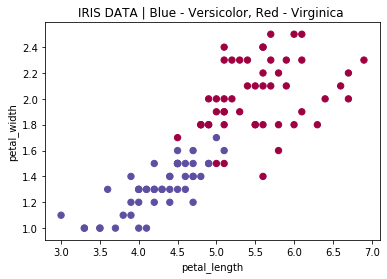

In [6]:
#Realiza un diagrama de dispersión

plt.scatter(X[0, :], X[1, :], c=Y[0,:], s=40, cmap=plt.cm.Spectral);
plt.title("IRIS DATA | Blue - Versicolor, Red - Virginica ")
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

In [7]:
# Los puntos azules representan las especies Versicolor y 
# los puntos rojos representan las especies Virginica. 
# Nuestra red neuronal entrenará estos datos para clasificar 
# correctamente las especies.

In [8]:
#Definimos los parametros que se van a recibir para establecer más adelante el tamño de la capa oculta 6
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2) #Se configura una semilla para que nuestra salida coincida con la nuestra aunque la inicialización sea aleatoria.
    W1 = np.random.randn(n_h, n_x) * 0.01 #Matriz de de peso, esta en la forma (n_h, n_x)
    b1 = np.zeros (shape = (n_h, 1)) #Caminos del vector de la forma (n_h,1)
    W2 = np.random.randn (n_y, n_h) * 0.01 #Matriz de peso, está en la forma (n_y,n_h)
    b2 = np.zeros (shape = (n_y, 1)) #Caminos del vector de la forma (n_y,1)
    #Se procede a almacenar cada uno de los parametros en un diccionario
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters #Retornamos los parametros almacenados en el diccionario
#Definimos la funcion para definir el tamaño de la capa
def layer_sizes(X, Y):
    n_x = X.shape[0] # Tamaño de la capa de entrada
    n_h = 6# Tamaño de la capa oculta
    n_y = Y.shape[0] # Tamaño de la capa de salida
    return (n_x, n_h, n_y)

In [9]:
# En el paso de propagación hacia adelante, 
# usaremos tanh como la primera función de activación y 
# sigmoide como la segunda función de activación.

In [10]:
def forward_propagation(X, parameters):
    
# recuperar parámetros inicializados del diccionario 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
# Implementar la propagación directa para calcular A2
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1) #tanh función de activación
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))  # función de activación sigmoide
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [11]:
#Se implementa la función que nos permitira calcular el costo
def compute_cost(A2, Y, parameters): #Parametros que recibira la funcion
    m = Y.shape[1] #Numero de ejemplos para el entrenamiento
    #Recuperamos la informacion de 'W1' y 'W2' de los parametros
    W1 = parameters ['W1'] 
    W2 = parameters ['W2'] 
    #Calculamos el costo
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    return cost #Se retorna el costo obtenido

In [12]:
#Definimos una funcion con la cual calculamos las derivadas de la funcion de costos
def backward_propagation(parameters, cache, X, Y): #Parametros que recibe la funcion
    # Número de ejemplos de entrenamiento 
    m = X.shape [1] 
    #Primero procedemos a recuperar los parametros 'W1' y 'W2' del diccionario donde se encuentra la información de ellos
    W1 = parameters['W1']
    W2 = parameters['W2']
    #Se finaliza el codigo aquí

    #Se continua recuperando los parametros de 'A1'y 'A2' del diccionario caché.
    A1 = cache['A1']
    A2 = cache['A2']
    
    #Ahora si definimos la funcion 'Propagación hacia atrás:' calcular dW1, db1, dW2, db2.
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    #Se gurda en un diccionario
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2} 
    return grads #Se retorna el diccionario

In [13]:
#Definimos una funcion para actulizar los parametros del paso anterior
def update_parameters(parameters, grads, learning_rate=1.2): #Parametros que recibe esa funcion
    #Recuperamos los parametros de la funcion 'parameters'
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Recuperamos los parametros de la funcion 'grads'
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    #Se actualiza la regla para cada parametro
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    #Los almacenamos en el diccionario
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters #Retornamos el parametro

In [14]:
#Hasta este punto se ha realizado lo siguiente para la red neuronal:
#1- Inicializar parámetros
#2- Propagación hacia adelante
#3- Función de costo
#4- Propagación hacia atrás
#5- Actualizar parámetros
#Procedemos a definir la siguiente funcion para continuar nuestra red neuronal
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    #Inicializamos parametros, luego recuperamos W1, b1, W2, b2. Las entradas son: "n_x, n_h, n_y". Las salidas son: "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Propagación hacia adelante. Entradas: "X, parámetros". Salidas: "A2, caché". 
        A2, cache = forward_propagation(X, parameters)
        
        # Función de costo. Entradas: "A2, Y, parámetros". Salidas: "costo".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Entradas: "parámetros, caché, X, Y". Salidas: "graduados".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Actualización del parámetro de descenso de gradiente. Entradas: "parámetros, graduados". Salidas: "parámetros". 
        parameters = update_parameters(parameters, grads)
        
        #Aqui termina codigo
        
        # Imprimimos las primeras 1000 iteraciones
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    return parameters #,n_h #Retornamos los parametros y costos

In [24]:
parameters = nn_model(X,Y , n_h = 6, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693225
Cost after iteration 1000: 0.648500
Cost after iteration 2000: 0.134067
Cost after iteration 3000: 0.126904
Cost after iteration 4000: 0.121865
Cost after iteration 5000: 0.123496
Cost after iteration 6000: 0.121045
Cost after iteration 7000: 0.113961
Cost after iteration 8000: 0.103626
Cost after iteration 9000: 0.088409


In [25]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 0.25, X[0, :].max() + 0.25
    y_min, y_max = X[1, :].min() - 0.25, X[1, :].max() + 0.25
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [26]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    return predictions

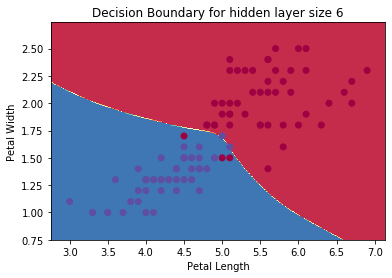

In [27]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y[0,:])
plt.title("Decision Boundary for hidden layer size " + str(6))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()